# Import Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# SQL
import sqlite3
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#-----------------------------------------------------------
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


# Data Collection
Objectives: 
* Describing how data was collected (API, Web Scraping, etc.)
* Cleaning the requested data
* Converting the data into a Data Frame

In [2]:
data_train = pd.read_csv('test.csv')
data_test = pd.read_csv('train.csv')

# Data Wrangling
Objectives:
* Filtering the Data
* Dealing with missing values
* Determine Training Labels
* Using One Hot Encoding to prepare the data to a binary classification

In [3]:
data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b>Infer:<b>
* 11 attributes and 418 entries (Passengers)
* Attributes "Age" , "Fare", "Cabin" contain Null values.
* Attributes "Name", "Sex", "Ticket", "Cabin", "Embarked" are non-numeric values.
* Attribute "PassengerId" is the Key attribute. It uniquely identifies each entry (passenger). 

## Act: Dealing with missing values in the attribute "Cabin"

In [5]:
data_train["Cabin"].value_counts(dropna=False)

Cabin
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64

<b>infer<b>: There 327 out of 418 passengers without designated cabin.

In [6]:
# Finding the different Cabin names
cabin_names = data_train["Cabin"].str.split(' ', expand=True).stack().tolist()
cabin_names = list(set(cabin_names))
cabin_names.sort()
print ("There are {} cabines".format(len(cabin_names)))
print("Cabin names:  ", *cabin_names)

There are 90 cabines
Cabin names:   A11 A18 A21 A29 A34 A9 B10 B11 B24 B26 B36 B41 B45 B51 B52 B53 B54 B55 B56 B57 B58 B59 B60 B61 B63 B66 B69 B71 B78 C101 C105 C106 C116 C130 C132 C22 C23 C25 C26 C27 C28 C31 C32 C39 C46 C51 C53 C54 C55 C57 C6 C62 C64 C7 C78 C80 C85 C86 C89 C97 D D10 D12 D15 D19 D21 D22 D28 D30 D34 D37 D38 D40 D43 E31 E34 E39 E41 E45 E46 E50 E52 E57 E60 F F2 F33 F4 G6 G63


In [7]:
# Categorizing the cabins
cabin_class =list(set(map(lambda item: str(item)[0], cabin_names)))
cabin_class

['A', 'C', 'E', 'D', 'F', 'B', 'G']

In [18]:
from collections import defaultdict
categories = defaultdict(list)
for item in cabin_names:
    first_letter = str(item)[0].upper()
    categories[first_letter].append(item)
categories_dict = dict(categories)
print(categories_dict)

{'A': ['A11', 'A18', 'A21', 'A29', 'A34', 'A9'], 'B': ['B10', 'B11', 'B24', 'B26', 'B36', 'B41', 'B45', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B60', 'B61', 'B63', 'B66', 'B69', 'B71', 'B78'], 'C': ['C101', 'C105', 'C106', 'C116', 'C130', 'C132', 'C22', 'C23', 'C25', 'C26', 'C27', 'C28', 'C31', 'C32', 'C39', 'C46', 'C51', 'C53', 'C54', 'C55', 'C57', 'C6', 'C62', 'C64', 'C7', 'C78', 'C80', 'C85', 'C86', 'C89', 'C97'], 'D': ['D', 'D10', 'D12', 'D15', 'D19', 'D21', 'D22', 'D28', 'D30', 'D34', 'D37', 'D38', 'D40', 'D43'], 'E': ['E31', 'E34', 'E39', 'E41', 'E45', 'E46', 'E50', 'E52', 'E57', 'E60'], 'F': ['F', 'F2', 'F33', 'F4'], 'G': ['G6', 'G63']}


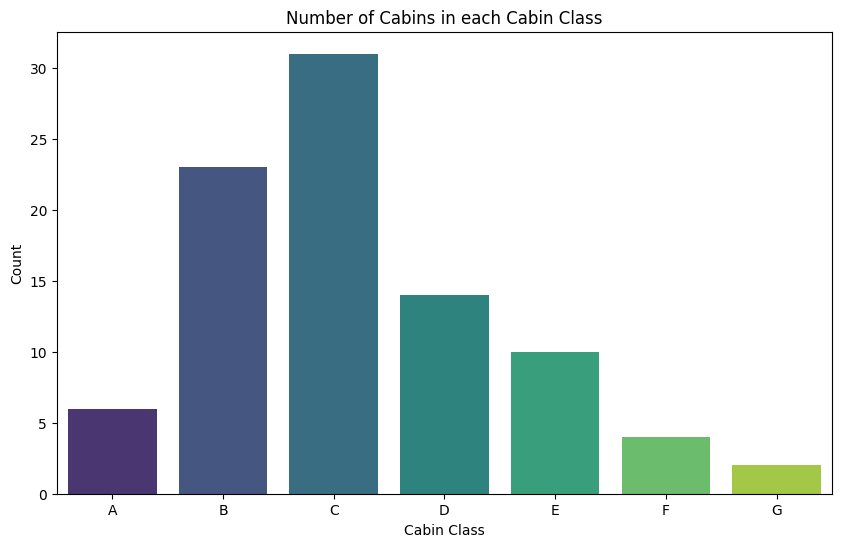

In [26]:
df = pd.DataFrame({
    'Letter': [letter for letter in categories_dict],
    'Count': [len(items) for items in categories_dict.values()]
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Letter', y='Count', hue ='Letter',data=df, palette='viridis')

# Add labels and title
plt.xlabel('Cabin Class')
plt.ylabel('Count')
plt.title('Number of Cabins in each Cabin Class')
plt.show()

<b>infer<b>:

# Exploratory Data Analysis (EDA)
Objectives:
* Exploratory Data Analysis with SQL
* Exploratory Data Analysis with Data Visualization
* Preparing Data Feature Engineering

g

# Interactive Visual Analytics
Objectives:
* Intreactive visual analytics using Folium, Plotly Dash, etc.

# Predictive Analysis

Objectives:
* Standardize the data
* Split into training data and test data
* Finding best Hyperparameter for different models such as SVM, Classification Trees, Logistic Regression and etc.
* Find the method performs best using test data

# Results and Discusion

# Conclusion